In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/VU Amsterdam/3rd Year/Period 4/Machine Learning/data.zip' .
!unzip data.zip

In [ ]:
!pip install fastai

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
from pathlib import Path
import tensorflow as tf

from fastai import vision
from fastai.metrics import *
import fastai
import warnings
warnings.filterwarnings('ignore')


In [ ]:
def getData():

    dir = 'data/'

    df = pd.read_csv(dir + 'labels.csv')

    df['path'] = df['path'].str.replace('\\', os.sep)

    return df

df = getData()

train_df = df.loc[(df['is_validation'] == 0) & (df['is_final_validation'] == 0)]
valid_df =df.loc[df['is_validation'] == 1]
test_df = df.loc[df['is_final_validation'] == 1 ]

train_val_df = df.loc[((df['is_validation'] == 0) & (df['is_final_validation'] == 0) )| df['is_validation'] == 1]
train_val_cleaned = pd.concat( [train_val_df.loc[train_val_df['is_bee'] == 1], train_val_df.loc[train_val_df['is_wasp'] == 1] ])

train_cleaned_df = pd.concat( [train_df.loc[train_df['is_bee'] == 1], train_df.loc[train_df['is_wasp'] == 1] ])
valid_cleaned_df = pd.concat( [valid_df.loc[valid_df['is_bee'] == 1], valid_df.loc[valid_df['is_wasp'] == 1] ])
test_cleaned_df = pd.concat( [test_df.loc[test_df['is_bee'] == 1], test_df.loc[test_df['is_wasp'] == 1] ])

In [ ]:
data = fastai.vision.data.ImageDataBunch.from_df(
    path = Path('data/'),
    df = train_val_cleaned,
    fn_col='path',
    folder=None,
    label_col='label',
    ds_tfms = fastai.vision.transform.get_transforms(do_flip=False), size=256, bs=64, num_workers=0
)

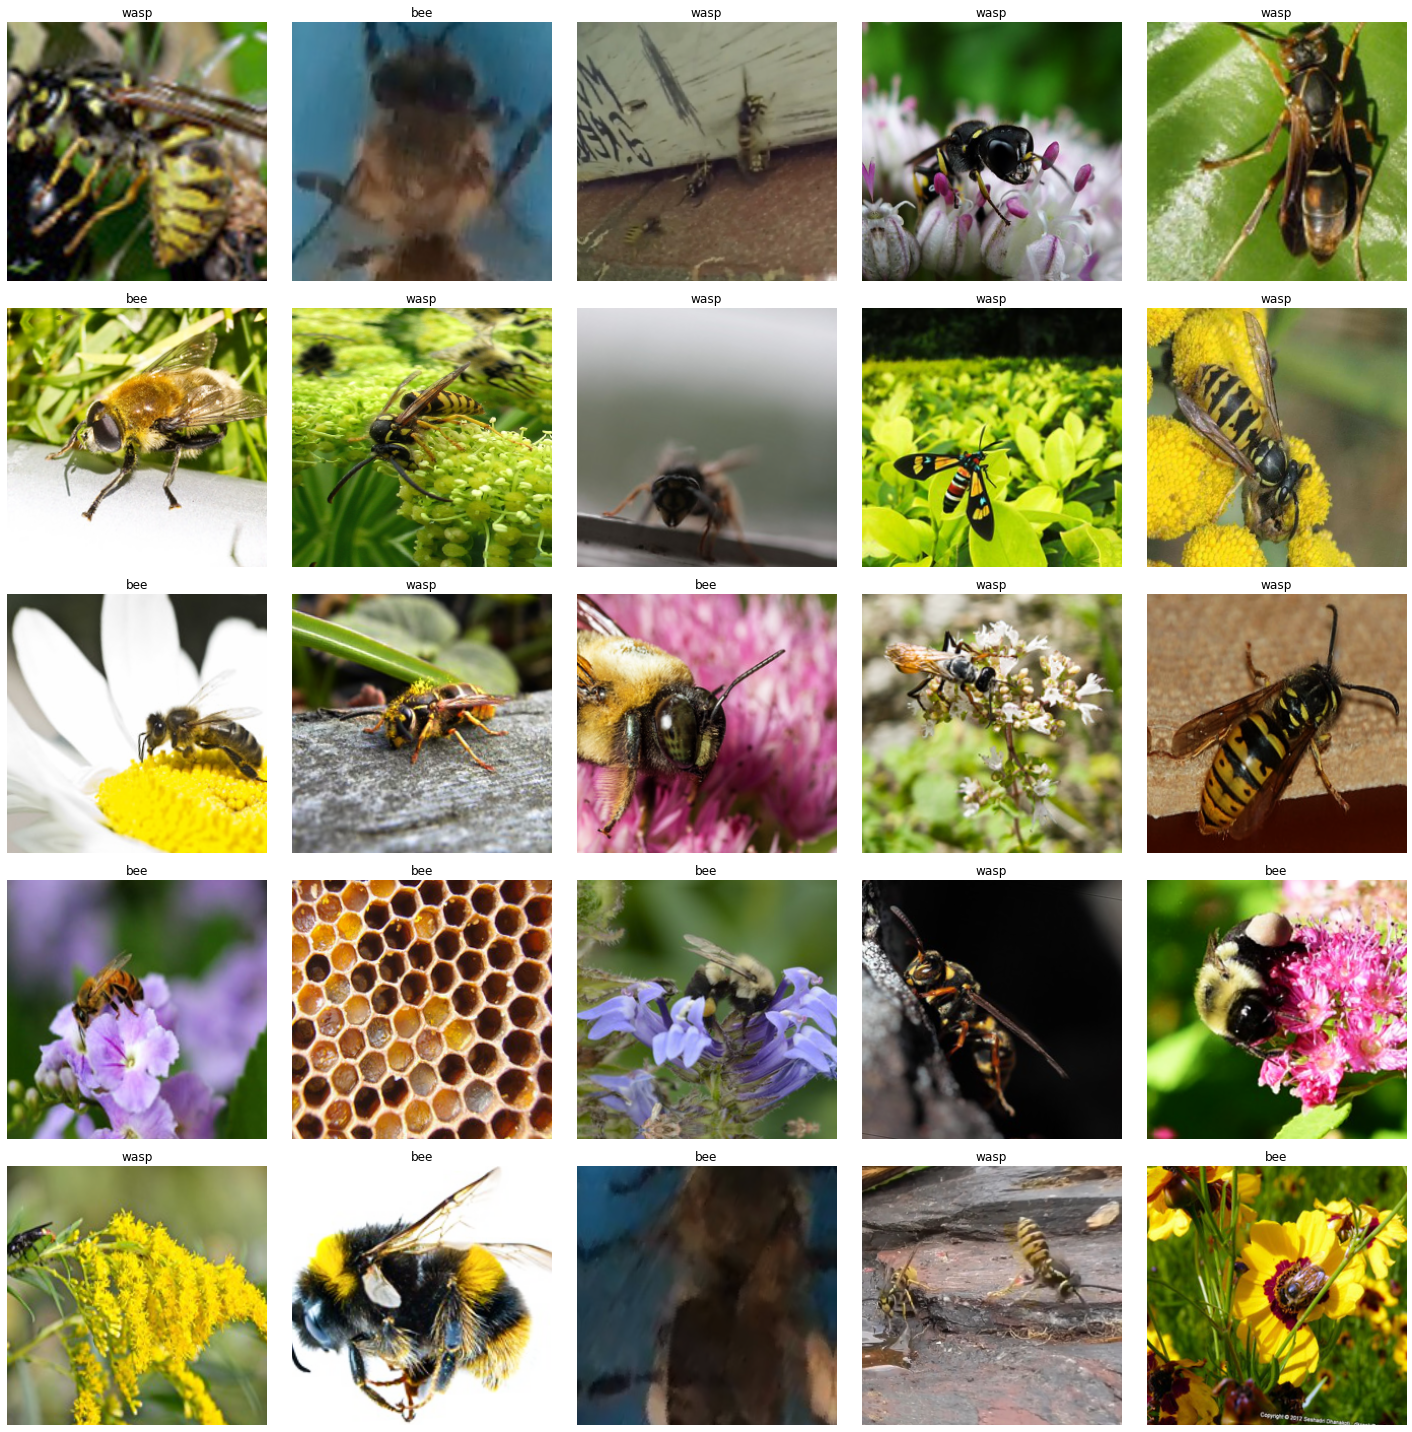

In [ ]:
data.show_batch()

In [ ]:
learn = fastai.vision.cnn_learner(data, fastai.vision.models.resnet34, metrics = [accuracy])

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('fastai_model2', return_path=True)

Path('data/models/fastai_model2.pth')